In [122]:
!pip install sentiment-analysis-spanish

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 58.4 MB/s eta 0:00:0000:0100:01


In [124]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 14.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [125]:
#cargar librerias
import pandas as pd
import matplotlib.pyplot as plt
import string
import unicodedata
import nltk
from textblob import TextBlob
from sentiment_analysis_spanish import sentiment_analysis
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

In [ ]:
#descargar paquetes
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/geissonguadir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/geissonguadir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
#funcion para remover tildes
def remove_tildes(text):
    return ''.join((c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn'))

In [82]:
#cargar el dataset
df = pd.read_csv('Instrumento-2.csv')

In [83]:
#revisar lo titulos
df.head()

,Timestamp,"Consentimiento Informado\n\nEstimad@ participante,\nLe invitamos a participar en una encuesta como parte de la investigación titulada: “Gestión de riesgos institucionales en el control de drogas ilícitas en la Compañía Antinarcóticos Aeropuerto Internacional El Dorado: seguridad en exportaciones”. Este estudio es conducido por MY Laura Cruz Carreño y MY Alejandra Saavedra Rojas, estudiantes de la Maestría en Gestión de la Seguridad de la Escuela de Postgrados de Policía (ESPOL).\n\nConfidencialidad y Protección de Datos\n- Su participación es completamente voluntaria y anónima.\n- Sus respuestas serán utilizadas únicamente con fines académicos y estarán protegidas conforme a la legislación vigente en materia de protección de datos y confidencialidad.\n- No se recopilará información que permita identificarle de manera individual.\n- La participación en este estudio no implica ningún riesgo ni afectará su desempeño laboral. \n- Esto tomará 30 minutos de su tiempo.\n\n¿Acepta participar en la investigación?",¿En qué unidad de la Dirección de Antinarcóticos se encuentra asignado?,¿Cuál es su cargo?,¿Cuál(es) es/son su(s) rol(es) principal(es) en los procedimientos de inspección? (Seleccione hasta 3 opciones).,¿Cuál es su sexo o identidad de género?,Rango de edad,¿Qué grado tiene actualmente?,¿Cuánto tiempo lleva desempeñándose en su cargo actual?,"Para conocer su experiencia operativa, en el último año, ¿en cuántos casos operativos de incautación de drogas ilícitas o capturas ha participado, ya sea de forma directa o indirecta?",...,15. ¿Qué tipo de capacitación especializada ha recibido para desempeñar su cargo actual? (Seleccione todas las opciones que correspondan).,16. ¿Con qué frecuencia recibe capacitación en temas relacionados con el control de drogas ilícitas?,17. ¿Cree que la capacitación que ha recibido es adecuada para las funciones que desempeña?,18. ¿En cuáles de los siguientes temas considera que necesita mayor capacitación para fortalecer su desempeño en el control de drogas ilícitas en aeropuertos? (Seleccione todas las opciones que apliquen).,"19. En su experiencia, durante la toma de decisiones en los procedimientos de control de drogas ilícitas, ¿ha tenido conflictos dentro de su equipo de trabajo o con otros grupos involucrados? \n\n(Ejemplo: falta de coordinación entre unidades operativas, demoras durante la judicialización, control del proceso, diferencias en la interpretación de normativas, duplicidad de funciones, falta de claridad en la distribución de responsabilidades, entre otros).","20. Cuando las decisiones en casos de control de drogas ilícitas deben ser tomadas de manera autónoma por el inspector o su equipo, pueden surgir diversos riesgos. Según su experiencia, \n\n¿cuál considera que es el principal riesgo asociado a esta toma de decisiones? (Seleccione la opción más relevante).","21. Cuando se detectan drogas ilícitas en un control aeroportuario, ¿considera que la cantidad de trámites, requisitos y autorizaciones administrativas afecta la agilidad del proceso en términos de judicialización, incautación y demás procedimientos?","22. ¿Cómo califica la relación de trabajo con las diferentes entidades y actores que participan en los controles de mercancías en el aeropuerto? (Incluyendo autoridades, empresas logísticas, agencias aduaneras, aerolíneas y seguridad aeroportuaria).",23. ¿Cuáles son los principales obstáculos para la implementación de nuevos procedimientos y estrategias en los controles de drogas ilícitas en el aeropuerto? (Seleccione la opción más relevante).,"El servicio de policía en los controles de drogas ilícitas es fundamental para la seguridad del aeropuerto y la lucha contra el narcotráfico. Queremos conocer, desde su experiencia, qué significa para usted esta labor y cuál considera que es su propósito.\n\nEn 3 a 7 palabras: ¿Cuál es el propósito o significado del control de drogas ilícitas en el aeropuerto?"
0,2025/03/14 2:58:09 PM EST,"Sí, acepto participar",Aeropuer

In [84]:
#solo tomar la respuesta abierta
df_cloud = df['El servicio de policía en los controles de drogas ilícitas es fundamental para la seguridad del aeropuerto y la lucha contra el narcotráfico. Queremos conocer, desde su experiencia, qué significa para usted esta labor y cuál considera que es su propósito.\n\nEn 3 a 7 palabras: ¿Cuál es el propósito o significado del control de drogas ilícitas en el aeropuerto?']

In [95]:
df_cloud

0     [ayudar, personas, libres, problemas, consumo,...
1                    [evitar, consumo, estupefacientes]
2     [combatir, cintrarrestar, narcotrafico, genera...
3                               [mitigar, narcotrafico]
4     [mitigar, trafico, drogas, destino, internacio...
                            ...                        
66                [prevenir, trafico, drogas, ilicitas]
68                   [evitar, trafico, estupefacientes]
69    [evitar, salida, drigas, ilicitas, destinos, i...
70                   [acabar, trafico, droga, ilicitas]
71    [diria, labor, mas, importante, policias, anti...
Name: El servicio de policía en los controles de drogas ilícitas es fundamental para la seguridad del aeropuerto y la lucha contra el narcotráfico. Queremos conocer, desde su experiencia, qué significa para usted esta labor y cuál considera que es su propósito.\n\nEn 3 a 7 palabras: ¿Cuál es el propósito o significado del control de drogas ilícitas en el aeropuerto?, Length: 71, dt

In [86]:
#contar los nulos
df_cloud.isnull().sum()

1

In [87]:
#eliminar los nulos
df_cloud = df_cloud.dropna()

In [88]:
#convertir en minúscula
df_cloud = df_cloud.str.lower()

In [90]:
#aplicar función para eliminar tildes
df_cloud = df_cloud.apply(remove_tildes)

In [92]:
# Tokenizar y remover puntuacion
df_cloud = df_cloud.apply(lambda x: word_tokenize(x.translate(str.maketrans('', '', string.punctuation))))

In [ ]:
# carga stopwords en español (palabras que no aportan significado)
stop_words = set(stopwords.words('spanish'))

In [94]:
# Remover stopwords
df_cloud = df_cloud.apply(lambda x: [item for item in x if item not in stop_words])

In [106]:
#contar todas las palabras
all_words = [word for words in df_cloud for word in words]
total_words = len(all_words)
# mostrar las 20 palabras más comunes
most_common_words = Counter(all_words).most_common(20)
most_common_words

[('evitar', 27),
 ('trafico', 27),
 ('drogas', 17),
 ('estupefacientes', 16),
 ('paises', 11),
 ('personas', 10),
 ('ilicitas', 10),
 ('narcotrafico', 8),
 ('pais', 7),
 ('sustancia', 6),
 ('vidas', 5),
 ('destinos', 5),
 ('internacionales', 5),
 ('prevenir', 5),
 ('salida', 5),
 ('mitigar', 4),
 ('internacional', 4),
 ('nivel', 4),
 ('parte', 4),
 ('salud', 4)]

In [ ]:
# Calcular promedio de palabras por respuesta
mean_phrase_length = df_cloud.apply(len).mean()

# Calcular la diversidad lexica
lexical_diversity = len(set(all_words)) / total_words

# 20 palabras más complejas (por longitud) y su conteo
most_complex_words = Counter(sorted(all_words, key=len, reverse=True)).most_common(20)

# 20 palabras menos comunes
least_common_words = Counter(all_words).most_common()[:-21:-1]

# hapax, palabras que solo aparecieron 1 vez
freq_dist = nltk.FreqDist(all_words)
hapax_legomena = freq_dist.hapaxes()

In [119]:
# Print results
print('Promedio palabras por respuesta:', mean_phrase_length)
print('Diversidad lexica:', lexical_diversity)
print('Palabras mas complejas:', most_complex_words)
print('palabras menos comunes:', least_common_words)
print('Hapax:', hapax_legomena)

Promedio palabras por respuesta: 6.169014084507042
Diversidad lexica: 0.4703196347031963
Palabras mas complejas: [('trafico', 27), ('evitar', 27), ('drogas', 17), ('estupefacientes', 16), ('paises', 11), ('personas', 10), ('ilicitas', 10), ('narcotrafico', 8), ('pais', 7), ('sustancia', 6), ('internacionales', 5), ('destinos', 5), ('prevenir', 5), ('salida', 5), ('vidas', 5), ('internacional', 4), ('contrarrestar', 4), ('sustancias', 4), ('mitigar', 4), ('nivel', 4)]
palabras menos comunes: [('fisica', 1), ('mental', 1), ('distribuyan', 1), ('fin', 1), ('beneficiamos', 1), ('incluso', 1), ('escenarios', 1), ('fenomeno', 1), ('directamente', 1), ('institucional', 1), ('mision', 1), ('antinarcoticos', 1), ('diria', 1), ('droga', 1), ('drigas', 1), ('humano', 1), ('prever', 1), ('coordinacion', 1), ('claridad', 1), ('presentan', 1)]
Hapax: ['libres', 'problemas', 'cintrarrestar', 'genera', 'colombia', 'destino', 'salvado', 'perforacion', 'indagando', 'poniendo', 'ejercicio', 'flujo', 'sis

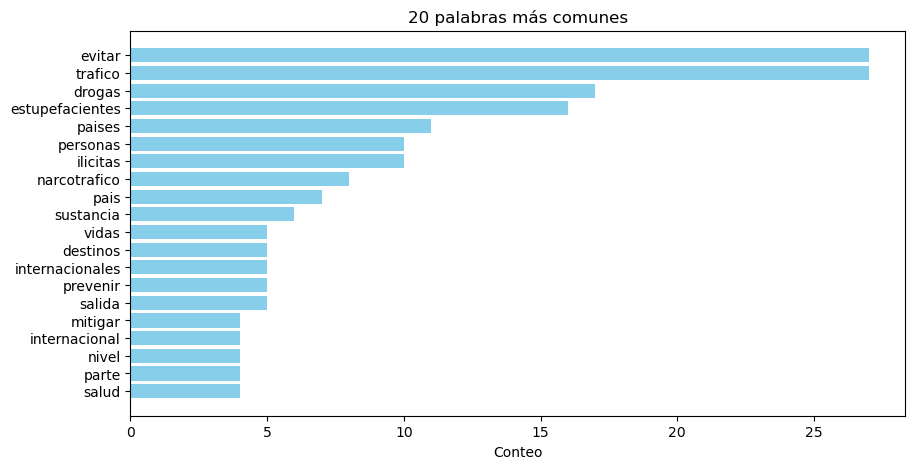

In [97]:
# Separar palabras y cotéo
words, counts = zip(*most_common_words)

# Crear un bar chart
plt.figure(figsize=(10, 5))
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.gca().invert_yaxis()  # Reverse the order of the y-axis
plt.xlabel('Conteo')
plt.title('20 palabras más comunes')
plt.show()

In [ ]:
#remover espacios antes y despues de cada token
df_cloud = df_cloud.apply(
    lambda token_list: [token.strip() for token in token_list]
)

In [ ]:
# crear una sola lista de tokens
all_tokens = [token for sublist in df_cloud for token in sublist]

# Remover posibles espacios en blanco
all_tokens = [token for token in all_tokens if token]

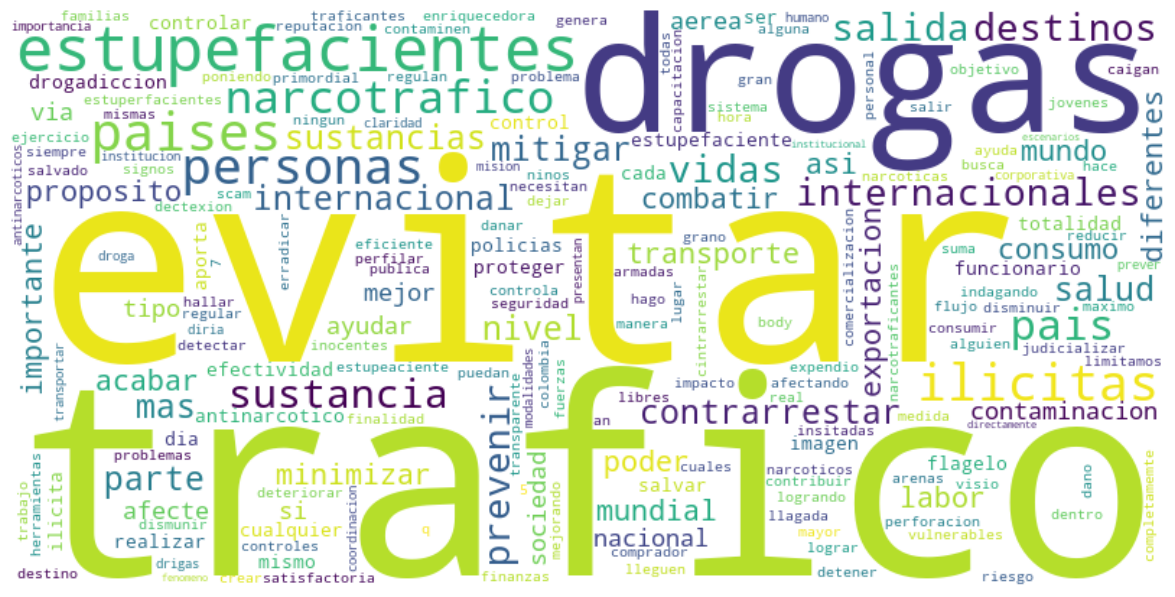

In [ ]:
# crear wordcloud
word_freq = Counter(all_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 20 bigramas más comunes
bigrams = ngrams(all_words, 2)

filtered_bigrams = [bigrams for bigrams in bigrams if not all(word == bigrams[0] for word in bigrams)]

most_common_bigrams = Counter(filtered_bigrams).most_common(20)

In [ ]:
# mostrar
print("20 bigramas más comunes:")
for bigram, count in most_common_bigrams:
    print(f"{bigram}: {count}")

20 bigramas más comunes:
('evitar', 'trafico'): 16
('trafico', 'estupefacientes'): 10
('drogas', 'ilicitas'): 6
('trafico', 'drogas'): 5
('destinos', 'internacionales'): 5
('ilicitas', 'evitar'): 4
('estupefacientes', 'paises'): 4
('paises', 'evitar'): 4
('estupefacientes', 'evitar'): 3
('drogas', 'paises'): 3
('evitar', 'salida'): 3
('consumo', 'estupefacientes'): 2
('mitigar', 'trafico'): 2
('nivel', 'mundial'): 2
('exportacion', 'drogas'): 2
('mejor', 'sociedad'): 2
('estupefacientes', 'destinos'): 2
('internacionales', 'via'): 2
('via', 'aerea'): 2
('tipo', 'sustancia'): 2


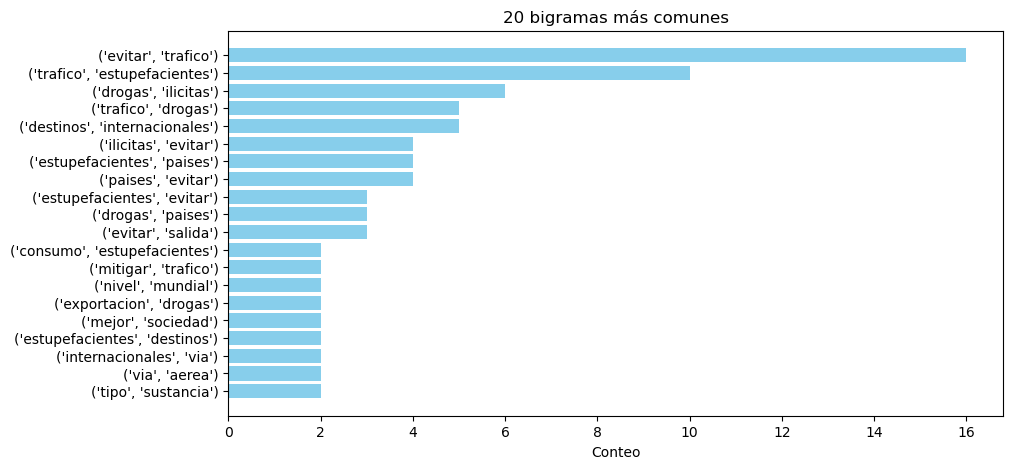

In [118]:
# Separar bigramas y conteo
bigrams, counts = zip(*most_common_bigrams)

# Crear bar chart
plt.figure(figsize=(10, 5))
plt.barh(range(len(bigrams)), counts, color='skyblue')
plt.yticks(range(len(bigrams)), bigrams)
plt.gca().invert_yaxis()
plt.xlabel('Conteo')
plt.title('20 bigramas más comunes')
plt.show()

In [ ]:
# 20 trigramas más comunes
trigrams = ngrams(all_words, 3)

filtered_trigrams = [trigram for trigram in trigrams if not all(word == trigram[0] for word in trigram)]
most_common_trigrams = Counter(filtered_trigrams).most_common(20)

# mostrar
print("20 trigramas más comune Policía Nacional:")
for filtered_trigrams, count in most_common_trigrams:
    print(f"{filtered_trigrams}: {count}")

20 trigramas más comune Policía Nacional:
('evitar', 'trafico', 'estupefacientes'): 9
('drogas', 'ilicitas', 'evitar'): 4
('ilicitas', 'evitar', 'trafico'): 3
('estupefacientes', 'paises', 'evitar'): 3
('trafico', 'drogas', 'ilicitas'): 3
('trafico', 'estupefacientes', 'evitar'): 2
('trafico', 'estupefacientes', 'destinos'): 2
('estupefacientes', 'destinos', 'internacionales'): 2
('destinos', 'internacionales', 'via'): 2
('internacionales', 'via', 'aerea'): 2
('trafico', 'estupefacientes', 'paises'): 2
('paises', 'evitar', 'trafico'): 2
('narcotrafico', 'evitar', 'trafico'): 2
('evitar', 'trafico', 'drogas'): 2
('prevenir', 'trafico', 'drogas'): 2
('ayudar', 'personas', 'libres'): 1
('personas', 'libres', 'problemas'): 1
('libres', 'problemas', 'consumo'): 1
('problemas', 'consumo', 'drogas'): 1
('consumo', 'drogas', 'mundo'): 1


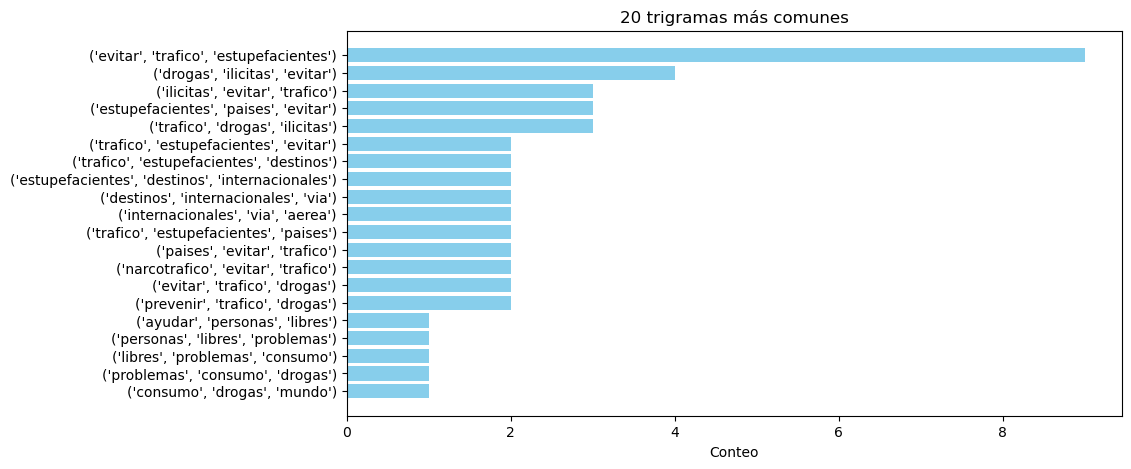

In [117]:
# separar trigrams y conteo
filtered_trigrams, counts = zip(*most_common_trigrams)

# Crear bar chart
plt.figure(figsize=(10, 5))
plt.barh(range(len(filtered_trigrams)), counts, color='skyblue')
plt.yticks(range(len(filtered_trigrams)), filtered_trigrams)
plt.gca().invert_yaxis()  # Reverse the order of the y-axis
plt.xlabel('Conteo')
plt.title('20 trigramas más comunes')
plt.show()

In [126]:
# Function to apply sentiment analysis
def get_sentiment(tokens):
    # Join the tokens into a string
    text = ' '.join(tokens)
    # Create a TextBlob object
    blob = TextBlob(text)
    # Get the sentiment polarity
    polarity = blob.sentiment.polarity
    # Classify the sentiment
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Respuestas' column
df_cloud['Sentiment'] = df_cloud.apply(get_sentiment)

In [127]:
# Get the count of each sentiment category
sentiment_counts = df_cloud['Sentiment'].value_counts()

# Print the counts
print(sentiment_counts)

El servicio de policía en los controles de drogas ilícitas es fundamental para la seguridad del aeropuerto y la lucha contra el narcotráfico. Queremos conocer, desde su experiencia, qué significa para usted esta labor y cuál considera que es su propósito.\n\nEn 3 a 7 palabras: ¿Cuál es el propósito o significado del control de drogas ilícitas en el aeropuerto?
neutral     69
positive     1
negative     1
Name: count, dtype: int64
